# Project II

## Importing Packages to Analyze CSV Files

In [106]:
import pandas as pd
import numpy as np
import math
import array
import os
import datetime
import pytz
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import json
import requests
import statistics

## Defining Functions for Data Analysis

In [4]:
def square(x):
    return x * x

def root(x):
    sroot = np.zeros(len(x))
    i = 0
    
    while i < len(x):
        sroot[i] = math.sqrt(x[i])
        i += 1
    return sroot

def roundtotwodp(x):
    rounded = np.zeros(len(x))
    i = 0
    
    while i < len(x):
        rounded[i] = round(x[i], 2)
        i += 1
    return rounded

def getwindspeed(north,west):
    windspeedsq = square(north) + square(west)
    windspeedr = root(windspeedsq)
    windspeed = roundtotwodp(windspeedr)
    return windspeed

In [5]:
def getwindytimes(windspeed):
    iswindy = (windspeed > 5)
        
    return iswindy

In [6]:
def getrainytimes(rain):
    israiny = (rain > 0.5)
        
    return israiny

0.5 mm/hr chosen as rainy based upon definitions from USGS listed here: https://water.usgs.gov/edu/activity-howmuchrain-metric.html

In [80]:
def daycounter(rain,wind):
    rainy = 0
    windy = 0
    both = 0
    calm = 0
    graph = []
    
    i = 0
    
    while i < len(rain):
        
        if rain[i] >= 0.5 and wind[i] > 5:
            both += 1
            graph.append('orchid')
        if rain[i] >= 0.5 and wind[i] <= 5:
            rainy += 1
            graph.append('lightblue')
        if rain[i] < 0.5 and wind[i] > 5:
            windy += 1
            graph.append('green')
        if rain[i] < 0.5 and wind[i] <= 5:
            calm += 1
            graph.append('orange')
            
        i += 1
        
    return calm,rainy,windy,both,graph

## Time Conversion

In [58]:
ntp_epoch = datetime.datetime(1900,1,1)
unix_epoch = datetime.datetime(1970,1,1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def sectodatetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond = 0)
#.strftime("%A, %B %d, %Y %I:%M:%S")

## Combining the CSV Files for each Instrument

### Oregon Offshore Surface Mooring

In [8]:
CSV_dir = "Data_Dumps\Project_2\Oregon_Offshore_Surface_Mooring"
Offshore_files = os.listdir(CSV_dir)
Numfiles = len(Offshore_files)

### Oregon Shelf Surface Monitoring

In [9]:
CSV_dir = "Data_Dumps\Project_2\Oregon_Shelf_Surface_Monitoring"
Shelf_files = os.listdir(CSV_dir)
Numfiles = len(Shelf_files)

test = np.array([3,6,4,8])
test2 = np.array([-1, 3, 1, 3])
velocity = getwindspeed(test,test2)
print(velocity)
windy = getwindytimes(velocity)
print(windy)
time = sectodatetime(3758196690.47)
time2 = sectodatetime(3758196755.43)
time3 = sectodatetime(3758196820.17)
time4 = sectodatetime(3758196883.14)

print (time)
print (time2)
print (time3)
print (time4)

## Machine to Machine Learning

In [12]:
Username = 'OOIAPI-IEG9BO4BLFWBHA'
Token = 'TEMP-TOKEN-SOSAD7HLVIQWWR'

In [19]:
r_1 = requests.get('https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_hourly?beginDT=2019-01-01T08:00:01.000Z&endDT=2020-01-01T08:00:01.000Z&limit=1000', auth=(Username, Token))
OOSM_data = r_1.json()

r_2= requests.get('https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_hourly?beginDT=2019-01-01T08:00:01.000Z&endDT=2020-01-01T08:00:01.000Z&limit=1000', auth=(Username, Token))
OSSM_data = r_2.json()

In [59]:
time_OS = []
rainRate_OS = []
windSpeed_OS = []
time_SS = []
rainRate_SS = []
windSpeed_SS = []

for i in range(len(OOSM_data)-1):
    time_OS.append(sectodatetime(OOSM_data[i]['pk']['time']))
    rainRate_OS.append(OOSM_data[i]["met_rainrte"])
    windSpeed_OS.append(OOSM_data[i]["metbk_a_dcl_instrument-met_relwind_speed"])

for i in range(len(OSSM_data)):
    time_SS.append(sectodatetime(OSSM_data[i]['pk']['time']))
    rainRate_SS.append(OSSM_data[i]["met_rainrte"])
    windSpeed_SS.append(OSSM_data[i]["metbk_a_dcl_instrument-met_relwind_speed"])

## Graphical Data Analysis Section:

### Oregon Offshore Surface Mooring

In [81]:
OScalmcount,OSraincount,OSwindcount,OSbothcount,OSgraph = daycounter(rainRate_OS, windSpeed_OS)

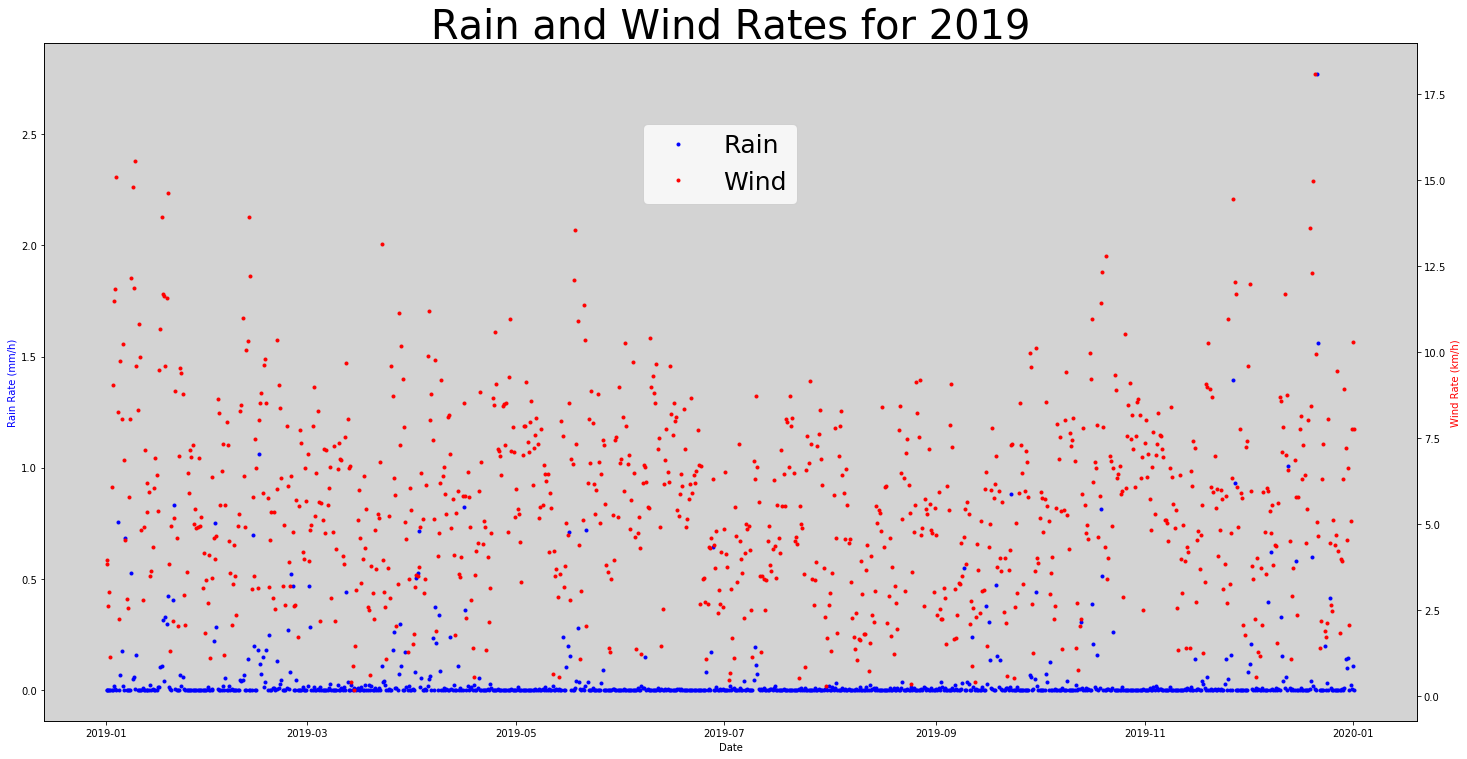

Text(0.5, 1.0, '2019 Weather by Rain and Wind')

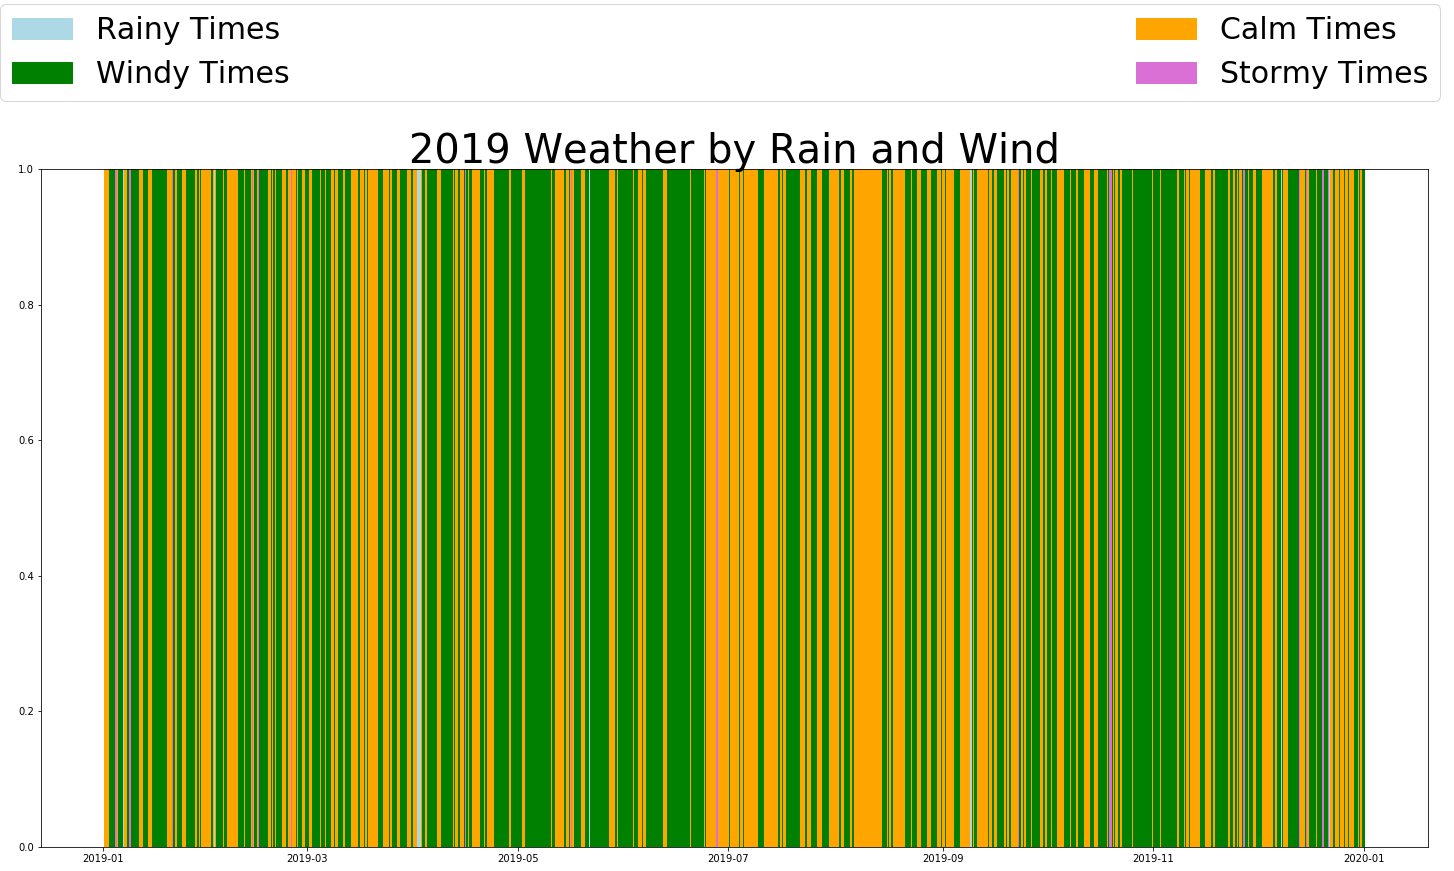

In [134]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

ax.plot(time_OS, rainRate_OS, '.b', label = 'Rain')
ax.set_facecolor('lightgrey')
ax.set_xlabel('Date')
ax.set_ylabel('Rain Rate (mm/h)', color = 'blue')

ax2.plot(time_OS, windSpeed_OS, '.r', label = 'Wind')
ax2.set_ylabel('Wind Rate (km/h)', color = 'red')
fig.legend(loc = 'upper center',bbox_to_anchor=(0.5, 0., 0., 0.9), prop={'size':25})
plt.title('Rain and Wind Rates for 2019', fontsize = 40)
plt.show()

fig2,ax = plt.subplots()
fig2.set_figheight(10)
fig2.set_figwidth(20)
fig2.tight_layout()

i = 0

while i < len(time_OS)-1:
    plt.axvspan(time_OS[i],time_OS[i+1], facecolor = OSgraph[i])
    
    i+=1

rain_patch = pch.Patch(color='lightblue', label='Rainy Times')
wind_patch = pch.Patch(color='green', label='Windy Times')
calm_patch = pch.Patch(color='orange', label='Calm Times')
storm_patch = pch.Patch(color='orchid', label='Stormy Times')

fig2.legend(handles = [rain_patch,wind_patch,calm_patch,storm_patch], prop={'size':30}, bbox_to_anchor=(0., 1.07, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.title('2019 Weather by Rain and Wind', fontsize = 40)

In [135]:
print('Rainy but Still:', OSraincount)
print('Windy but Dry:', OSwindcount)
print('Calm:', OScalmcount)
print('Stormy:', OSbothcount)

Rainy but Still: 9
Windy but Dry: 551
Calm: 423
Stormy: 18


In [94]:
time_OS[1].month

1

#### Combined Graph

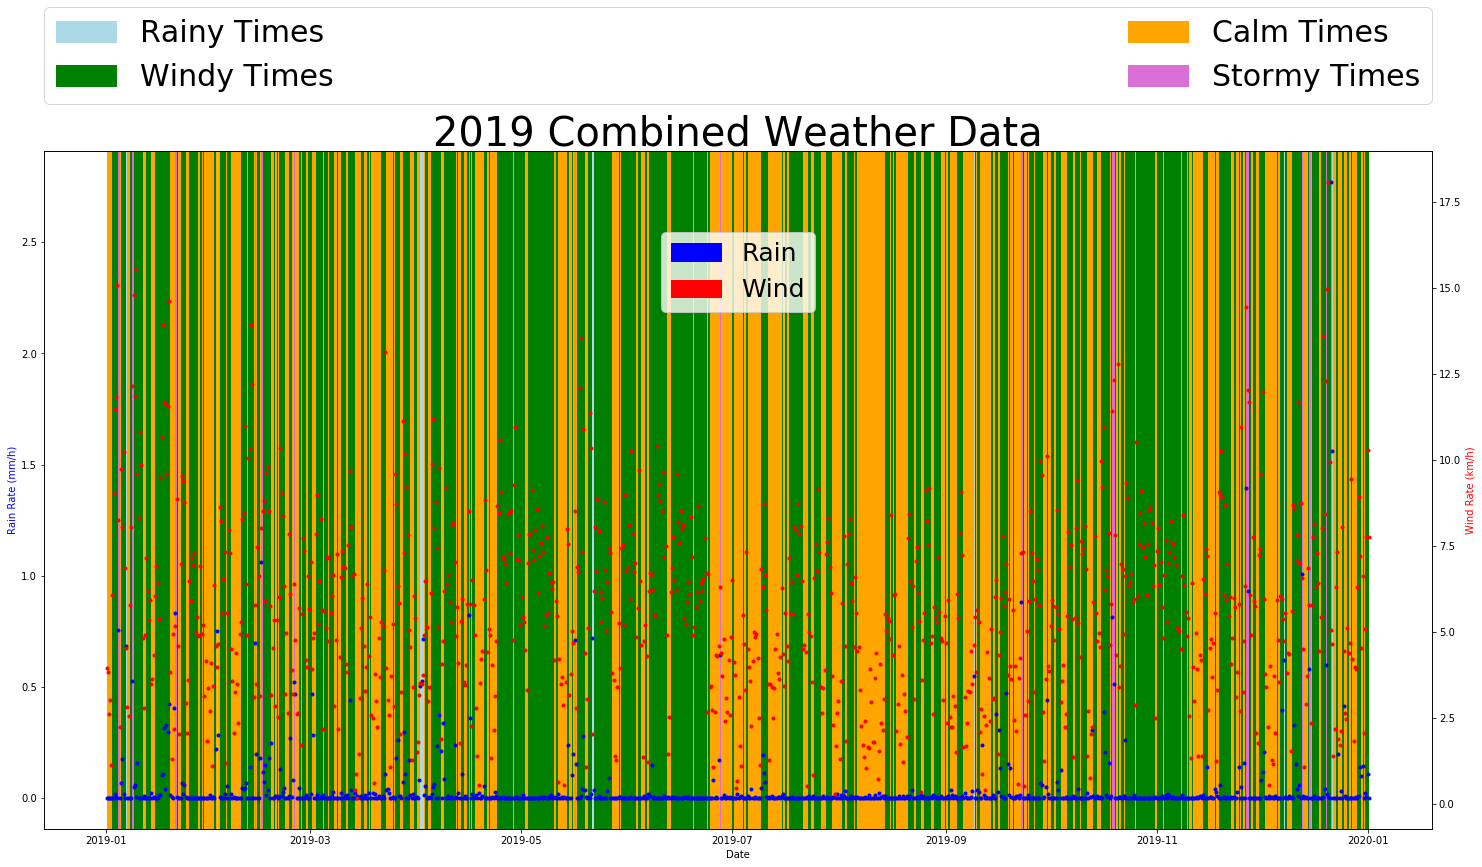

In [136]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

ax.plot(time_OS, rainRate_OS, '.b', label = 'Rain')
ax.set_xlabel('Date')
ax.set_ylabel('Rain Rate (mm/h)', color = 'blue')

i = 0

while i < len(time_OS)-1:
    plt.axvspan(time_OS[i],time_OS[i+1], facecolor = OSgraph[i])
    
    i+=1

ax2 = ax.twinx()
ax2.plot(time_OS, windSpeed_OS, '.r', label = 'Wind')
ax2.set_ylabel('Wind Rate (km/h)', color = 'red')

day_legend = plt.legend(handles = [rain_patch,wind_patch,calm_patch,storm_patch], prop={'size':30}, bbox_to_anchor=(0., 1.07, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

ax = plt.gca().add_artist(day_legend)

raindot_patch = pch.Patch(color='blue', label='Rain')
winddot_patch = pch.Patch(color='red', label='Wind')
plt.legend(handles = [raindot_patch, winddot_patch], loc = 'upper center',bbox_to_anchor=(0.5, 0., 0., 0.9), prop={'size':25})
plt.title('2019 Combined Weather Data', fontsize = 40)

plt.show()

### Oregon Shelf Surface Monitoring

In [137]:
SScalmcount,SSraincount,SSwindcount,SSbothcount,SSgraph = daycounter(rainRate_SS, windSpeed_SS)

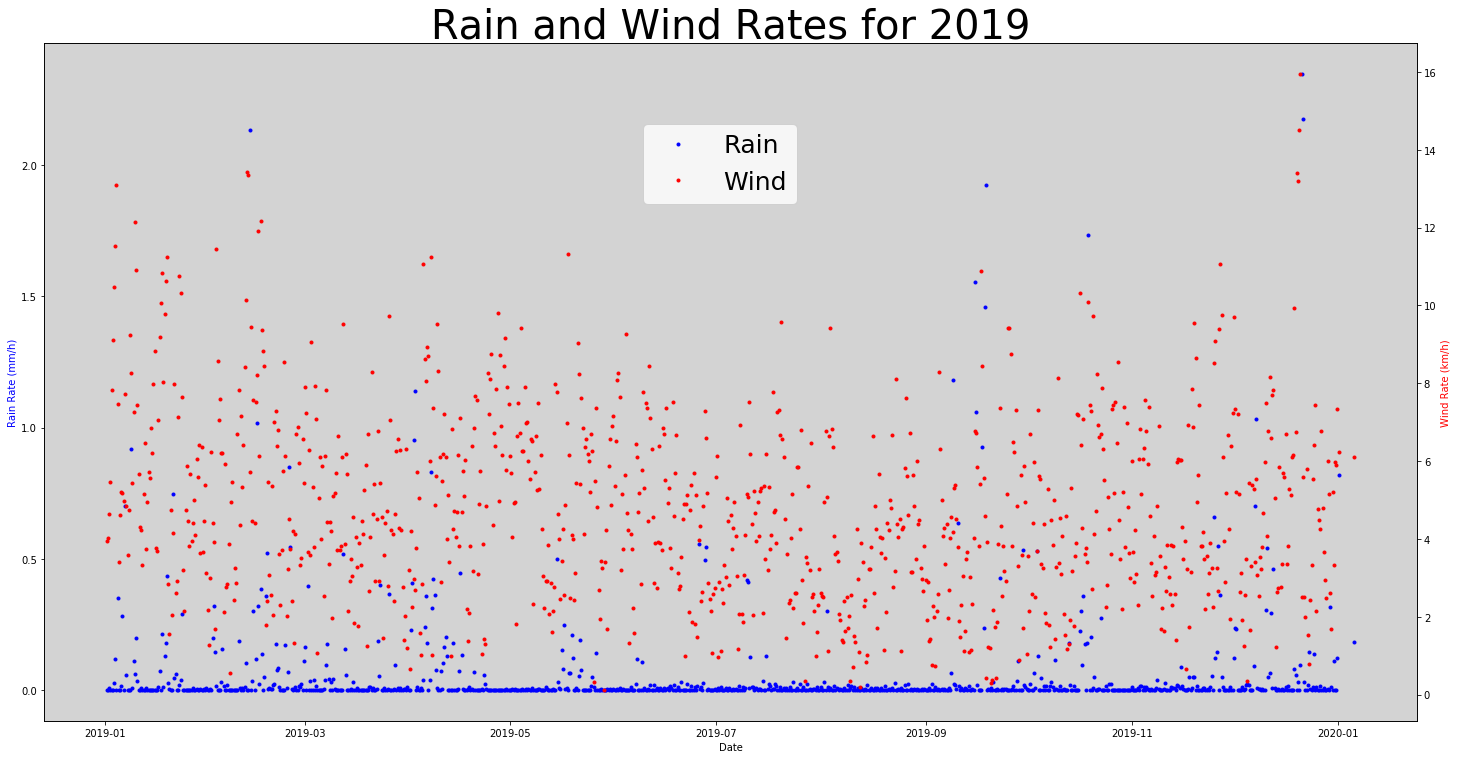

Text(0.5, 1.0, '2019 Weather by Rain and Wind')

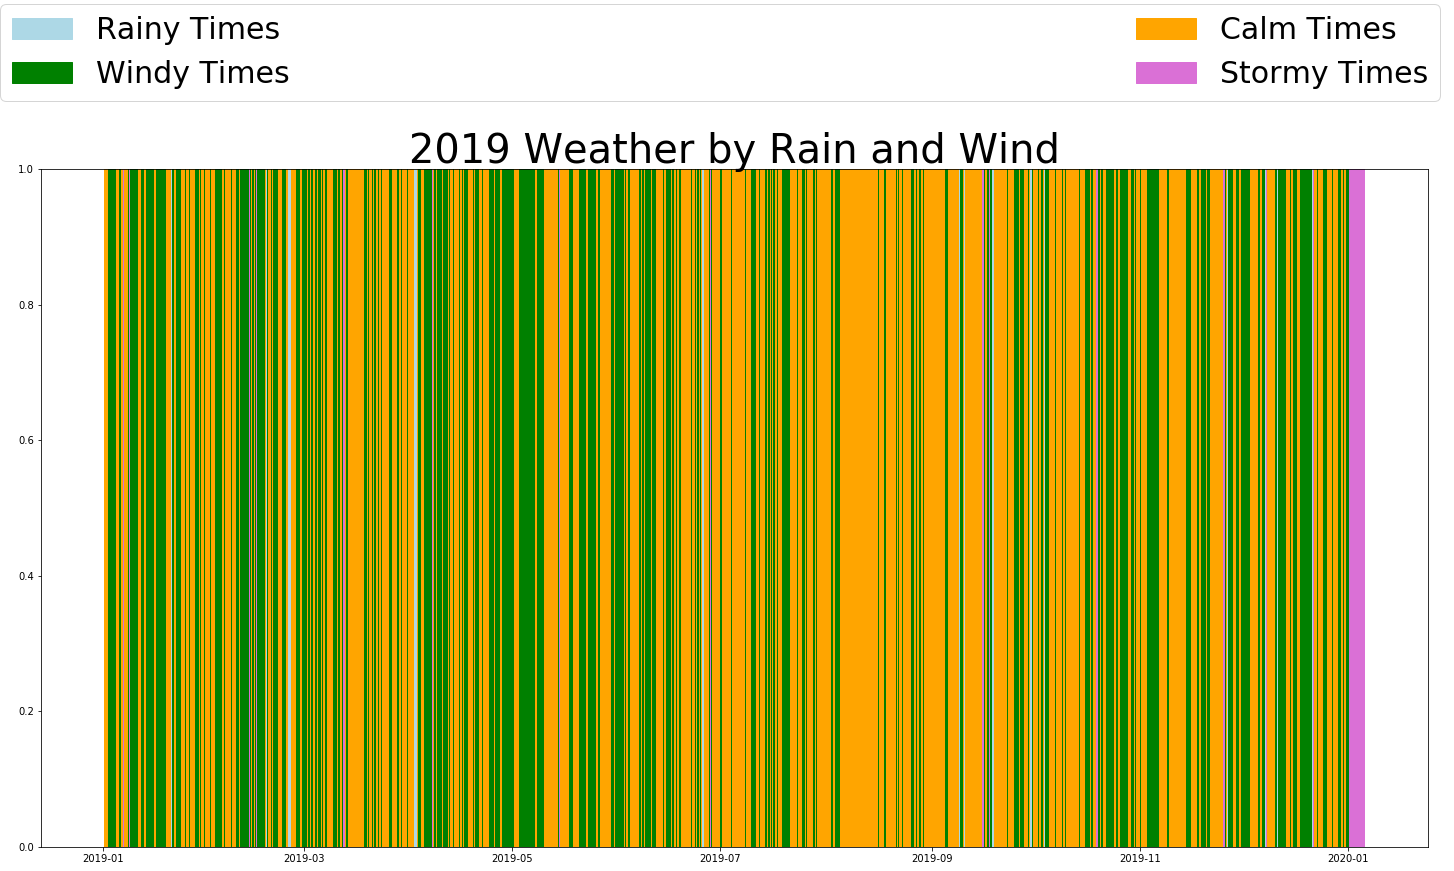

In [138]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

ax.plot(time_SS, rainRate_SS, '.b', label = 'Rain')
ax.set_facecolor('lightgrey')
ax.set_xlabel('Date')
ax.set_ylabel('Rain Rate (mm/h)', color = 'blue')

ax2.plot(time_SS, windSpeed_SS, '.r', label = 'Wind')
ax2.set_ylabel('Wind Rate (km/h)', color = 'red')
fig.legend(loc = 'upper center',bbox_to_anchor=(0.5, 0., 0., 0.9), prop={'size':25})
plt.title('Rain and Wind Rates for 2019', fontsize = 40)
plt.show()

fig2,ax = plt.subplots()
fig2.set_figheight(10)
fig2.set_figwidth(20)
fig2.tight_layout()

i = 0

while i < len(time_SS)-1:
    plt.axvspan(time_SS[i],time_SS[i+1], facecolor = SSgraph[i])
    
    i+=1

rain_patch = pch.Patch(color='lightblue', label='Rainy Times')
wind_patch = pch.Patch(color='green', label='Windy Times')
calm_patch = pch.Patch(color='orange', label='Calm Times')
storm_patch = pch.Patch(color='orchid', label='Stormy Times')

fig2.legend(handles = [rain_patch,wind_patch,calm_patch,storm_patch], prop={'size':30}, bbox_to_anchor=(0., 1.07, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.title('2019 Weather by Rain and Wind', fontsize = 40)

In [139]:
print('Rainy but Still:', SSraincount)
print('Windy but Dry:', SSwindcount)
print('Calm:', SScalmcount)
print('Stormy:', SSbothcount)

Rainy but Still: 17
Windy but Dry: 409
Calm: 559
Stormy: 16


#### Combined Graph

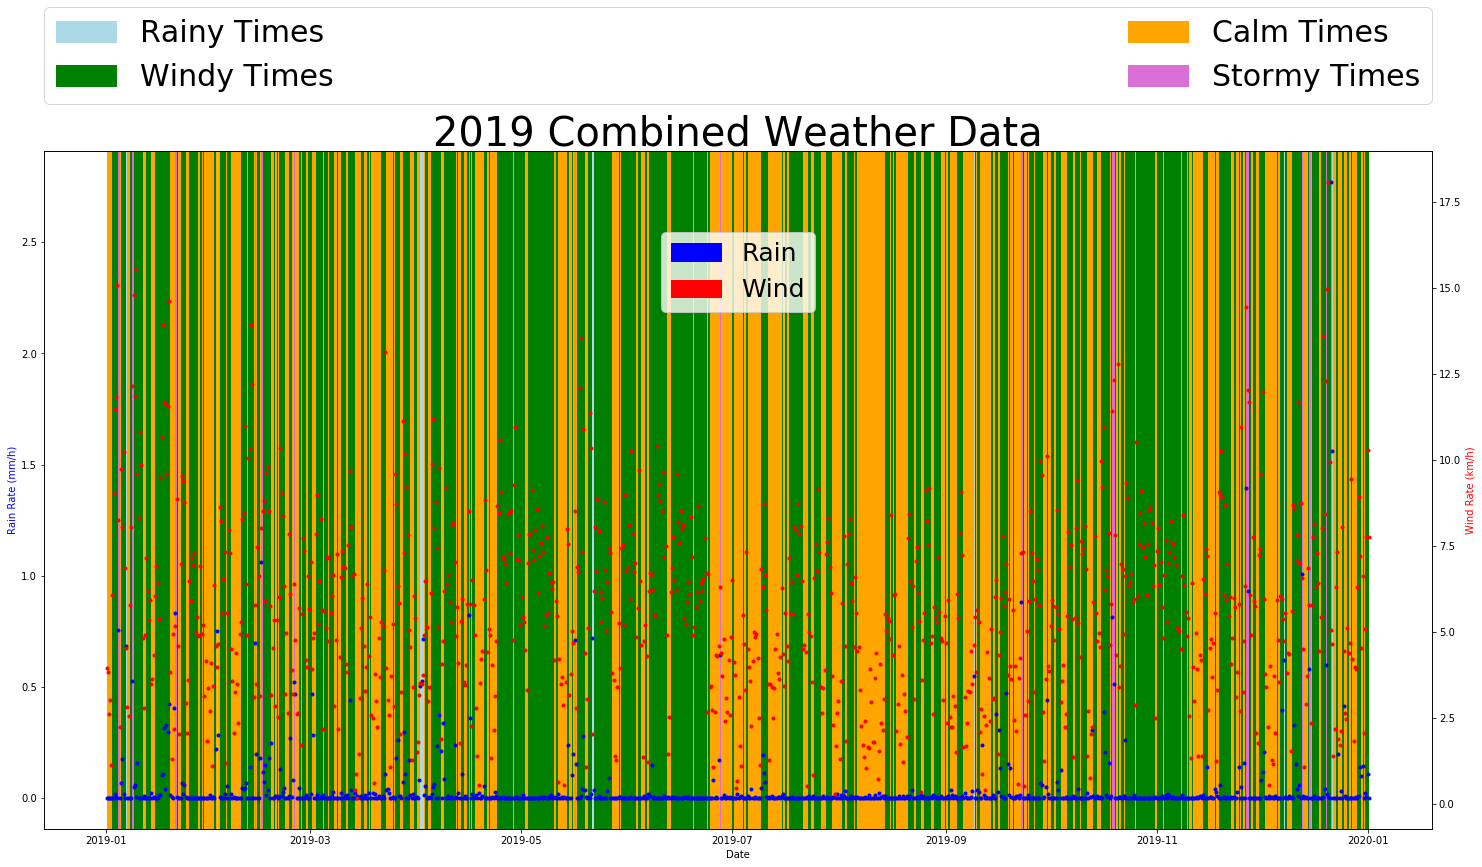

In [136]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

ax.plot(time_SS, rainRate_SS, '.b', label = 'Rain')
ax.set_xlabel('Date')
ax.set_ylabel('Rain Rate (mm/h)', color = 'blue')

i = 0

while i < len(time_SS)-1:
    plt.axvspan(time_SS[i],time_SS[i+1], facecolor = SSgraph[i])
    
    i+=1

ax2 = ax.twinx()
ax2.plot(time_SS, windSpeed_SS, '.r', label = 'Wind')
ax2.set_ylabel('Wind Rate (km/h)', color = 'red')

day_legend = plt.legend(handles = [rain_patch,wind_patch,calm_patch,storm_patch], prop={'size':30}, bbox_to_anchor=(0., 1.07, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

ax = plt.gca().add_artist(day_legend)

raindot_patch = pch.Patch(color='blue', label='Rain')
winddot_patch = pch.Patch(color='red', label='Wind')
plt.legend(handles = [raindot_patch, winddot_patch], loc = 'upper center',bbox_to_anchor=(0.5, 0., 0., 0.9), prop={'size':25})
plt.title('2019 Combined Weather Data', fontsize = 40)

plt.show()

## Cross Correlation Comparisons

### Rain Correlation

In [147]:
print(len(rainRate_OS))

1001


max correlation is at lag 1


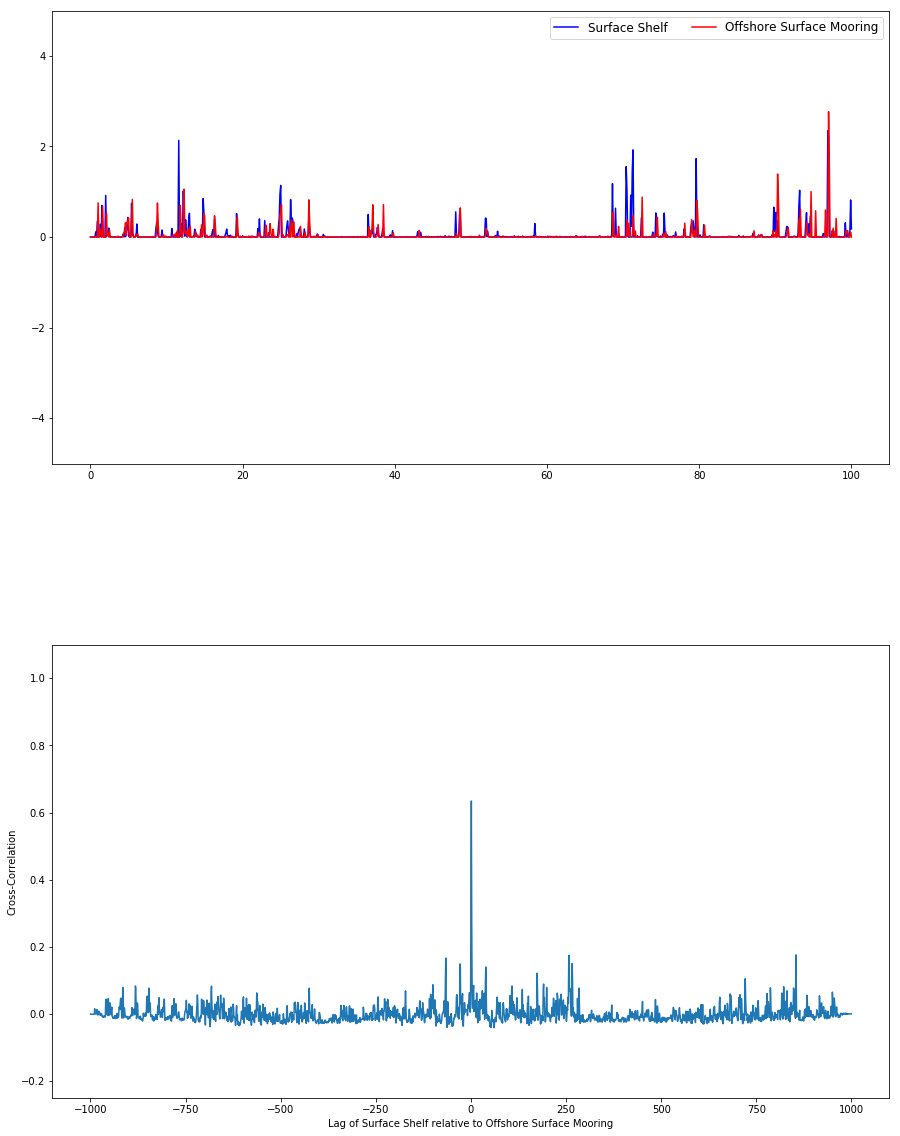

In [157]:
npts = 1001
x = np.linspace(0, 100, npts)

t1=np.asarray(time_OS)
t2=np.asarray(time_SS)

y1=np.asarray(rainRate_OS)
y2=np.asarray(rainRate_SS)


lags = np.arange(-len(t1) + 1, len(t1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
fig.set_figheight(20)
fig.set_figwidth(15)
ax = axs[0]
ax.plot(x, rainRate_SS, 'b', label='Surface Shelf')
ax.plot(x, rainRate_OS, 'r', label='Offshore Surface Mooring')
ax.set_ylim(-5, 5)
ax.legend(loc='upper right', fontsize='large', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-0.25, 1.1)
ax.set_ylabel('Cross-Correlation')
ax.set_xlabel('Lag of Surface Shelf relative to Offshore Surface Mooring')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

### Wind Correlation

Cross Corritlation Function:
multiply the samples from 2 datas at same timestamps, then normalize